In [1]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cd /home/pimienta/Documents/repos/coding/vocalpy/songdkl

/home/pimienta/Documents/repos/coding/vocalpy/songdkl


In [3]:
def add_records(models_root: pathlib.Path, version: str, records: list) -> None:
    means_npys = sorted(models_root.glob('*.mod1.means.npy'))
    covars_npys = sorted(models_root.glob('*.mod1.covars.npy'))

    means = [
        np.load(means_npy) for means_npy in means_npys
    ]

    covars = [
        np.load(covars_npy) for covars_npy in covars_npys
    ]

    for means_npy_path, means_npy in zip(means_npys, means):
        model = means_npy_path.name.split('.')[0]
        for val in means_npy.flatten():
            records.append(
                {
                    'model': model,
                    'variable': 'mean',
                    'value': val,
                    'version': version,
                }
            )

    for covars_npy_path, covars_npy in zip(covars_npys, covars):
        model = covars_npy_path.name.split('.')[0]
        for val in covars_npy.flatten():
            records.append(
                {
                    'model': model,
                    'variable': 'covar',
                    'value': val,
                    'version': version,
                }
            )

In [4]:
records = []

In [5]:
pcb_models_root = pathlib.Path('./results/fit-models/pcb-script/')

In [6]:
add_records(pcb_models_root, 'pcb-script', records)

In [7]:
songdkl_models_root = pathlib.Path('./results/fit-models/songdkl-script/')

In [8]:
add_records(songdkl_models_root, 'songdkl-pkg', records)

In [9]:
df = pd.DataFrame.from_records(records)

In [11]:
sns.set()
sns.set_context('notebook')

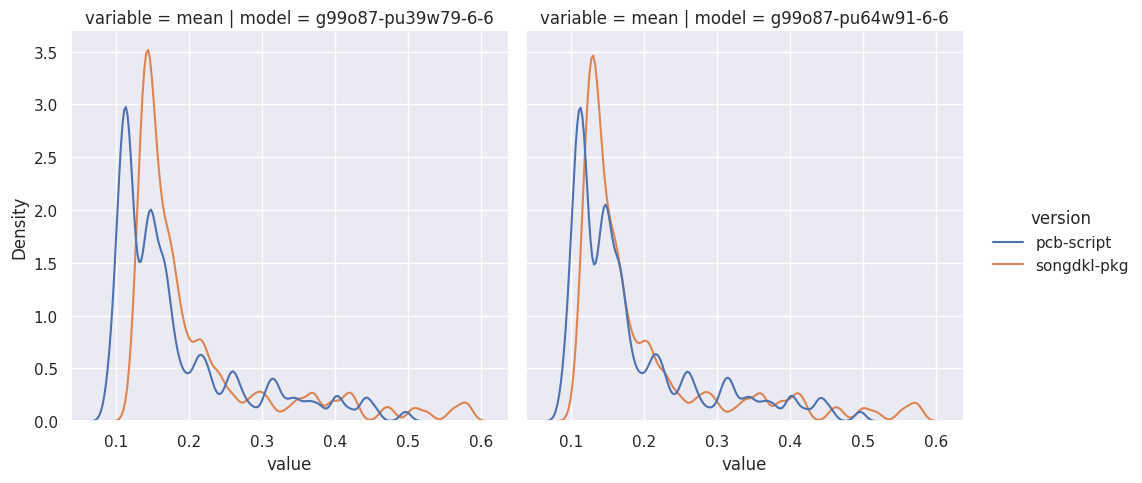

In [12]:
sns.displot(
    data=df[df.variable == 'mean'],
    x='value',
    hue='version',
    kind='kde',
    row='variable',
    col='model',
    bw_adjust=.25
)

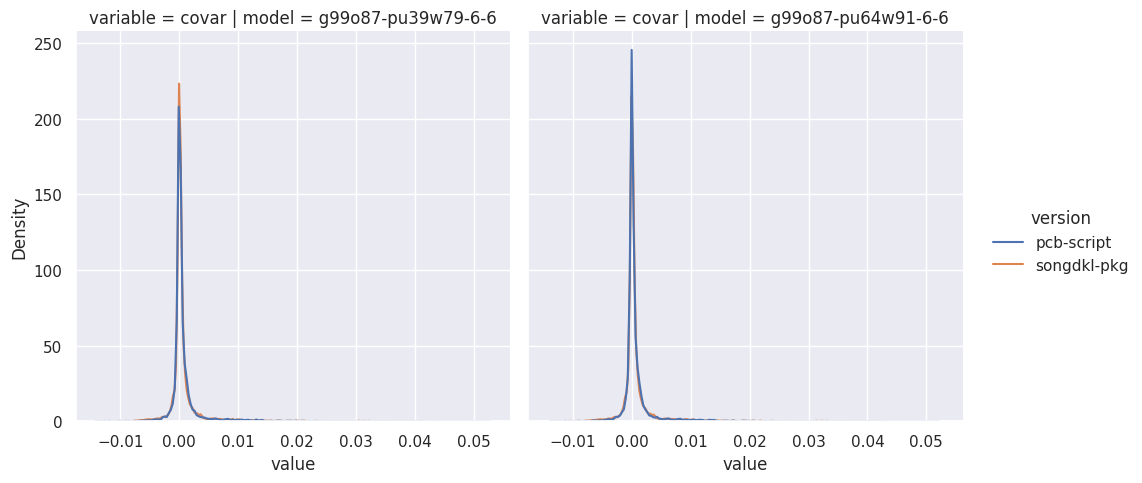

In [13]:
sns.displot(
    data=df[df.variable == 'covar'],
    x='value',
    hue='version',
    kind='kde',
    row='variable',
    col='model',
    bw_adjust=.25
)

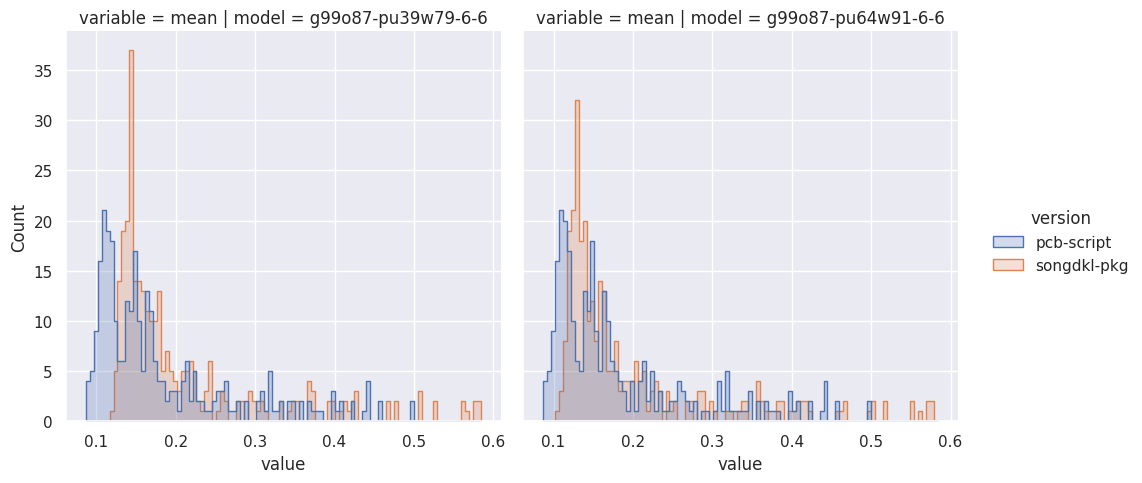

In [14]:
sns.displot(
    data=df[df.variable == 'mean'],
    x='value',
    hue='version',
    kind='hist',
    row='variable',
    col='model',
    bins=100,
    element="step"
)

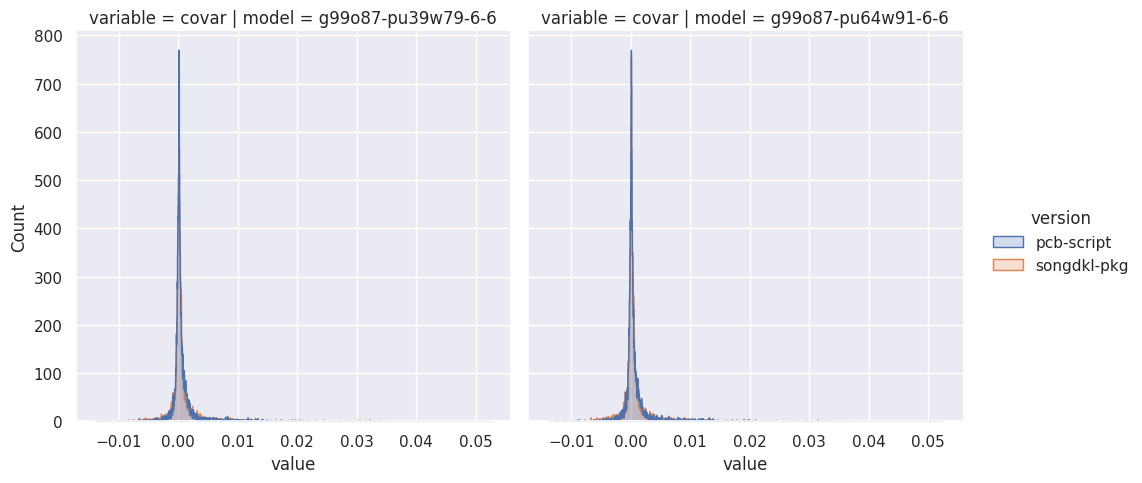

In [15]:
sns.displot(
    data=df[df.variable == 'covar'],
    x='value',
    hue='version',
    kind='hist',
    row='variable',
    col='model',
    element="step"
)